## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


THE MNIST DATASET WAS DOWNLOADED FROM KAGGLE 

In [2]:
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape #we have 42000 images and 785 columns

(42000, 785)

In [5]:
data = np.array(data)
np.random.shuffle(data) #shuffling the data
m, n = data.shape
m,n

(42000, 785)

In [6]:
x = data[:, 1:].T/255.0  # extracting the pixel value 
y = data[:, 0]   # extracting the labels in the first column
print(x.shape)
print(y.shape)

(784, 42000)
(42000,)


## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


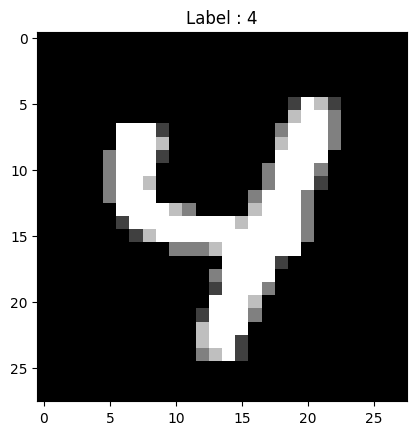

In [8]:
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()
#random image along with its label
img = image(0)


In [9]:
#one hot encoding
def one_hot(y):
    one_hot_y = np.zeros((10, y.size))
    for i in range(y.size):
        one_hot_y[y[i], i] = 1
    return one_hot_y
one_hot_y = one_hot(y)
one_hot_y.shape

(10, 42000)

In [41]:
#def parameters() :

class Parameters:
    def __init__(self):
        self.W1 = (np.random.randn(10, 784) - 0.5 )*0.01  # adding bias to the weights
        self.W2 = (np.random.randn(10, 10) - 0.5)*0.01
        self.b1 = np.zeros((10,m)) - 0.5
        self.b2 = np.zeros((10, m)) - 0.5  
        self.alpha  = 0.1    # learning rate
params = Parameters()
W1 = params.W1
W2 = params.W2
b1 = params.b1
b2 = params.b2
alpha = params.alpha
        

print(W1.shape, W2.shape, b1.shape, b2.shape)
x.shape, one_hot_y.shape



(10, 784) (10, 10) (10, 42000) (10, 42000)


((784, 42000), (10, 42000))

In [42]:
#ACTIVATION FUNCTIONS 
 
def RELU(L):
    return np.maximum(0, L) #rectified linear unit

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0 , keepdims=True) #softmax function
 

In [43]:
def for_pass(W1, W2, b1, b2, x):
    L1 = np.dot(W1, x) + b1 #first layer
    A1 = RELU(L1) #activation function
    L2 = np.dot(W2, A1) + b2 #second layer
    A2 = softmax(L2) #activation function
    return L1, A1, L2, A2



L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)


In [44]:
def der_Relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [ ]:
def back_pass(L2, A2, one_hot_y, W2, A1, x, L1):
     #error in the second layer
    dL2 = A2 - one_hot_y  # error in the second layer
    dW2 = np.dot(dL2, A1.T)/m #gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m #gradient of the bias in the second layer
    dL1 = np.dot(W2.T, dL2) * der_Relu(L1) #error in the first layer
    dW1 = np.dot(dL1, x.T)/m #gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m #gradient of the bias in the first layer
    return dL2, dW2, db2, dL1, dW1, db1
  

In [46]:
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    #alpha = 0.01
    W1 = W1 - alpha*dW1    #aplha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2

In [47]:
def get_predictions(A2) :
    return np.argmax(A2, 0) #returns the index of the maximum value in the array

In [48]:
def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size  # returns the accuracy of the model


In [49]:
def compute_loss(A2, one_hot_y):
    m = one_hot_y.shape[1]  # Number of examples
    loss = -np.sum(one_hot_y * np.log(A2 + 1e-8)) / m  # Adding epsilon to avoid log(0)
    return loss


In [50]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
        loss = compute_loss(A2, one_hot_y)
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        #acal
        # cculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        if i % 100 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    return W1, W2, b1, b2, A2
            
W1, W2, b1, b2, A2 = gradient_descent(x, one_hot_y, 0.5, 2000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)


 

accuracy is 0.09838095238095237
loss is 2.30258499299405
accuracy is 0.11152380952380953
loss is 2.301160851872294
accuracy is 0.11152380952380953
loss is 2.301160798734351
accuracy is 0.11152380952380953
loss is 2.30116079873104
accuracy is 0.11152380952380953
loss is 2.30116079873104
accuracy is 0.11152380952380953
loss is 2.3011607987310394
accuracy is 0.11152380952380953
loss is 2.301160798731041
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accuracy is 0.11152380952380953
loss is 2.3011607987310403
accura

NameError: name 'accuracy_list' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

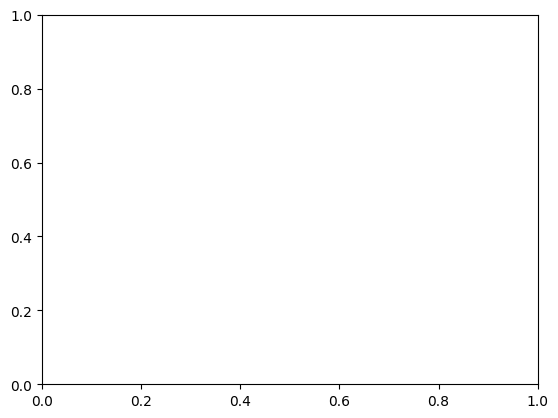

In [51]:
plt.plot(range(0, 1000, 100), accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()

In [54]:
!jupyter nbconvert --to html mnist.ipynb


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
